# Lineer Regresyon (✗)
> En basit regresyon modeli.

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- image: images/chart-preview.png

# Linear Regression

*Regresyon*, bir veya daha fazla bağımsız değişkenle bir bağımlı değişkenin ilişkisini modelleyen metodlara verilen genel isimdir. Doğa bilimlerinde ve sosyal bilimlerde regresyonun amacı genellikle girdiler ve çıktılar arasındaki bağı karakterize etmektir. Buna karşın Makine Öğrenmesi ise çoğunlukla *tahmin* ile ilgilidir. 

Ne zaman sayısal bir değeri tahmin etmek istesek regresyon karşımıza çıkar. Yaygın örnekler arasında fiyat tahmini (ev, hisse senedi gibi), bir yerde kalma süresinin tahmini (hastanede kalma süresi gibi), arz tahmini (emlak satışları için) vardır. Her tahmin problemi regresyon problemi değildir. İleriki bölümlerde sınıflandırma problemlerini inceleyeceğiz. Sınıflandırmada amaç kategoriler arasından doğru olanı tahmin etmedir, dolayısıyla regresyon problemi değildir.

## Lineer Regresyonun Temel Ögeleri

*Lineer regresyon*, standart regresyon araçları arasında hem en popüler hem de en basit olanıdır. Geçmişi 19. Yüzyıla dayanan lineer regresyon basit bir kabülden yola çıkar. Öncelikle $\mathbf{x}$ bağımsız değişkenleri ile $y$ bağımlı değişkeninin lineer olarak bağlantılı olduğunu kabul ederiz. Yani $y$ değişkeni $\mathbf{x}$ vektörünün bileşenlerinin lineer birleşimi ile gözlem hatasınının toplamıdır. İkincisi gözlem hatası düzenlidir, özel olarak Gauss dağılımına sahiptir.          

Amacımızı daha iyi ifade etmek için bir örnek kullanalım. Ev fiyatlarını alanına ve yaşına göre tahmin etmek istiyoruz. Bu kestirimi yapabilmek amacıyla uygulayacağımız model için fiyatını, alanını ve yaşını bildiğimiz satış verisine (data set) ihtiyacımız var. Makine Öğrenmesi terminolojisinde veriye *eğitim seti* (training set) ve bu kümenin elemanlarına (bu örnekte her bir satış oluyor) bir *örnek* ya da *veri noktası* denir. Bu örnekteki fiyat gibi tahmin etmeye çalıştığımız şeye *etiket* (label) ya da *hedef* (target) denir. Örneğimizdeki evin alanı ve yaşı gibi bağımsız değişkenlere *özellikler* (features) denir.  

Veri kümemizdeki örneklerin sayısını $n$ ile gösteriyoruz. Veri örneklerini indekslemek için $i$ harfini kullanacağız. Dolayısyla $y^{(i)}$ etiketine karşılık gelen özellikler $\mathbf{x}^{(i)} = [x_1^{(i)}, x_2^{(i)}]^\top$ ile gösterilecektir. 

### Lineer Model

Lineerlik kabulü gereği hedef (fiyat), özelliklerin (alan ve yıl) lineer birleşimidir:

$$fiyat = w_{\textrm{alan}} \cdot \textrm{alan} + w_\textrm{yıl} \cdot \textrm{yıl} + b.$$

Burada , $w_{\textrm{alan}}$ and $w_{\textrm{yıl}}$ katsayılarına *ağırlıklar*, $b$ sayısına called a *yanlılık* denir. Ağırlıklar herbir özelliğin (feature) tahminimiz üzerinde ne kadar etkili olduğunu, yanlılık terimi de teüm üzellikler sıfır olduğunda tahmin edilen fiyatın kaç olduğunu belirler. Evin alanı veya yaşı sıfır olmaz ama yanılık terimi modelimizin temsil yeterliliğinin kısıtlanmaması açısından önemlidir.  

Amacımız, elimizdeki veri için $\mathbf{w}$ ağırlılarını $b$ yanlılığını uygun şekilde belirlemektir. Bu sayede modelimizin yaptığı tahminler ile veri kümesindeki gerçek değerler ortalama olarak örtüşmelidir.

Makine öğrenmesinde yüksek boyutlu veri kümeleri ile çalığılır, yani özelliklerin sayısı çok fazladır. Örneğin bir fotoğrafın her bir pikseli bir özellik olarak alınır. Dolayısıyla matrisler ve vektörler gibi Lineer Cebir araçlarını kullanmak yararlı olur. Herbir veri (girdi), $d$ özelliğe sahip ise $\hat{y}$ tahminimizi  

$$\hat{y} = w_1  x_1 + ... + w_d  x_d + b.$$

şeklinde ifade ederiz. Tüm özellikleri $\mathbf{x} \in \mathbb{R}^d$ vektörünün bileşenleri ile, tüm ağırlıkları da $\mathbf{w} \in \mathbb{R}^d$ vektörünün bileşnleri ile gösterirsek, modelimizi 

$$\hat{y} = \mathbf{w}^\top \mathbf{x} + b$$

nokta çarpımıyla ifade etmiş oluruz. 

Burada $\mathbf{x}$ vektörü bir tek veri örneğine karşılık gelen özellik vektörüdür. Veri kümesi $n$ örnekten oluşsun ve hepsini $\mathbf{X} \in \mathbb{R}^{n \times d}$ matrisinde bir araya getirelim. Burada herbir $\mathbf{x}$ vektörü $\mathbf{X}$ matrisinin bir sütununu oluşturmaktadır. $\mathbf{X}$ matrisine *dizayn matrisi* veya *veri matrisi* denir.   

Özelliklerin bir araya getirilmesi ile oluşan $\mathbf{X}$ için  $\hat{\mathbf{y}} \in \mathbb{R}^n$ tahminimiz matris-vektör çarımıyla

$${\hat{\mathbf{y}}} = \mathbf{X} \mathbf{w} + b,$$

biçiminde ifade edilebilir. Burada $b$ vektörü aslında aynı $b$ sayısının $n$ defa yazılmasıyla oluşan vektördür. Python programlamadaki yayımlama (broadcasting) gibi. Lineer regresyonda amaç, $\mathbf{X}$ eğitim kümemizdeki özellikler ve karşılık gelen $\mathbf{y}$ etiketleri için, aynı dağılımdan gelen yeni bir örnek için tahmindeki hatayı beklenen değer olarak en az yapan $\mathbf{w}$  ve $b$ terimlerini bulmaktır.    

$\mathbf{x}$ verildiğinde $y$ için en iyi tahmini veren modelin lineer olduğunu düşünsek de, her $1 \leq i \leq n$ için gerçek $y^{(i)}$ ile $\mathbf{w}^\top \mathbf{x}^{(i)}+b$ tahmininin eşit olmasını bekleyemeyiz. Örneğin $\mathbf{X}$ özellikleri ve $\mathbf{y}$ etiketleri küçük ölçüm hataları yaılmış olabilir. Dolayısıyla, geri landa yatan ilişkinin lineer olduğundan emin olsak bile bu tür küçük hataları ifade eden bir gürültü (noise) terimini de dahil edeceğiz. 

En iyi $\mathbf{w}$ and $b$ parametrelerini aramaya başlamadan önce iki şey yapmalıyız: (i) modelin kalitesini ölçen bir araç ve (ii) modelin kalitesini iyileştirmek için izlenecek yol.  

### Kayıp Fonksiyonu (Loss Function)

Modelimizi veriye uydurmaya başlamadan önce *uyum* (fitness) için bir ölçeğe ihtiyacımız var. *Kayıp fonksiyonu* sayesinde *gerçek* ve *tahmini* değer arasındaki mesafeyi ölçeriz. Kayıp genellikle negatif olmayan bir sayıdır ve küçük olması istenir hatta mükemmel sonuç için sıfırdır. Regresyon problemlerinde en çok kullanılan kayıp fonksiyonu hataların karelerinin toplamıdır. Buna *en küçük kareler hata fonksiyonu* da denir. Eğer $i$ numaralı örneğimiz için tahminimiz $\hat{y}^{(i)}$ ve karşılık gelen doğru etiket $y^{(i)}$ ise, hatanın karesi 

$$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2$$

olur. 

Burada $1/2$ katsayısı sonucu değiştirmez ama türev alındığında sadeleşeceği için işlem kolaylığı sağlar. Eğitim kümemiz hazır olarak verildiğinden bizim kontrolümüz dışındadır, dolayısıyla yukarıdaki deneysel hata (emprical losss) sadece model parametrelerinin fonksiyonudur. Anlatılanları somutlaştırmak adına bir boyutlu durum için regresyon problemini aşağıdaki grafikte gösterelim.   

![Fit data with a linear model.](https://d2l.ai/_images/fit_linreg.svg)

Burada hataların kareleri alındığından büyük hatların kayıp fonksiyonunu çok fazla büyüteceğine dikkat edin. Tüm veri kümesi üzerinden modelin kalitesini ölçmek için hataların ortalamasını (ya da sadece toplamını) alırız:

$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

Modeli eğitirken, parametrelerin ($\mathbf{w}^*, b^*$) toplam kayıbı en küçük yapmasını yani

$$\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b)$$

istiyoruz.

### Analitik Çözüm

Lineer Regreyon az rastlanır ölçüde basit bir optimizasyon problemdir. Karşılaşacağımız birçok modelin aksine lineer regresyon analitik bir şekilde çözülür ve global optimum bulunur. İlk olarak $b$ yanlılık terimini $\mathbf{w}$ arametrelerine eklyelelim buna karşılık dizayn matrisine $1$ sayılarından oluşan bir sütun ekleyelim. Bu durumda tahmin problemimiz $||\mathbf{y} - \mathbf{X}\mathbf{w}||^2$ ifadesini minimize etmeye dönüşür. Bu ikinci dereceden bir ifade olduğu için konvekstir.  

Dolayısıyla kayıp fonksiyonunun belirttiği yüzey üzerinde bir tek kritik nokta vardır, bu da global minimuma karşılık gelir. Kayıp fonksiyonunun $\mathbf{w}$ üzerinden türevini alıp sıfıra eşitlersek,  

$$\mathbf{w}^* = (\mathbf X^\top \mathbf X)^{-1}\mathbf X^\top \mathbf{y}$$

analitik çözümünü elde ederiz. Analitik çözüm matematiksel analiz için yararlı olsa da matrisin tersin içerdiğinden pratikte kullanışsızdır. Derin öğrenmede bu şekilde analitik çözümler neredeyse hiç kullanılmaz.

### Gradient Azalım (Gradient descent)

Modelimizi analitik olarak çözemezek veya kayıp yüzeyimiz yüksek boyutlu ve konveks olmasa bile pratikte modelimizi etkin bir biçimde eğitebiliriz. Hatta birçok iş için bu optimize edilmesi güç görünen modeller daha kolay eğitilebilirler ve daha kullanılışlı olurlar.    

Neredeyse tüm Derin Öğrenme modellerinde optimizasyon için kullanılan kilit yöntem, hatayı azaltmak için parametrelerin kayıp fonksiyonunun azaldığı yönde güncellendiği itreratif yöntemdir. Bu algoritmaya *gradiyent azalım* denir. Konveks yüzeyler için global minimuma eninde sonunda ulaşılır fakat konveks olmayanlar için (genellikle yeterince iyi olan) bir yerel minimuma yönelir.  

Gradiyent azalımı kullanırken kayıp fonksiyonunun verinin tamamı üzerinden türevini almak kaba bir yaklaşım olur çünkü bu veri kümesindeki her bir örnek için elde edilen kayıp değerlerinin ortlamasıdır. Her güncelleme adımında veri kümesinin tamamını tarayacağımızdan hesap çok uzun sürer. Genellikle her güncellemede verinin tamamı yerine örneklerden rastgele bir *yığın* (batch) alınır. Buna *stokastik gradiyent azalım* denir.      

Her ötelemede (iteration) belli sayıda örnekten oluşan rastgele küçük bir $\mathcal{B}$ yığını seçilir. Daha sonra yığının ortalama kayıbının model parametrelerine göre türevi (gradiyenti) hesaplanır. Son olarak da gradiyent belli bir $\eta > 0$ adım boyu ile çarpılıp güncel parametre değerinden çıkarılır.    

Güncellemeyi matematiksel olarak şöyle ifade edebiliriz: 

$$(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b).$$

Burada $\partial$ ile kısmi türev gösterilmektedir. Algoritmanın adımları: (i) parametreler için başlangıç değerleri seçmek, genellikle rastgele seçilir (ii) veriden her bir adım için rastgele yığınlar seçmek ve parametrleri negatif gradiyent doğrultusunda güncellemek olarak özetlenebilir.  

İkinci dereceden kayıplar ve lineer fonksiyonlar için güncellemeyi açık olarak bulabiliriz. Burada $\mathbf{w}$ ve $\mathbf{x}$ vektörlerdir. $w_1, w_2, \ldots, w_d$ bileşenlerini kullanmak yerine vektör gösterimi matematiksel ifadeleri daha okunaklı yapar. Sonuç olarak güncelleme

$$
\begin{aligned}
\mathbf{w} &\leftarrow \mathbf{w} -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) && =
\mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right),\\
b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_b l^{(i)}(\mathbf{w}, b)  && =
b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)
\end{aligned}
$$

biçiminde ifade edilebilir. Yukarıdaki eşitliklerde $|\mathcal{B}|$ ile *yığın boyutu* (batch size) ve $\eta$ ile de *öğrenme parametresi* (learining rate) gösterilmektedir. Yığın boyutu ve öğrenme parametresini önceden belirlediğimizi, bunların öğrenilmediğini vurgulamak gerekir. Bu şekilde değiştirilebilen fakat öğrenme sırasında güncellenmeyen parametrelere *hiperparametre* denir. *Hiperparametre ayarlama* (hyerparameter tuning), bunların uygun biçimde seçilmesi işlemidir ve eğitim kümesi ile elde edilen sonuçların ayrı bir *doğrulama kümesi* (validation set) ile denenmesi sayesinde yapılabilir.

Belli sayıda güncellemeden sonra ya da belli şartlar sağlandığında eğitme (training) durdurulur. Sonra bulduğumuz parametreler kaydedilir. Bu parametreler gerçek parametrelerin tamin edilen değerleridir ve $\hat{\mathbf{w}}, \hat{b}$ ile gösterilirler. Fonksiyonumuz tam olarak lineer olsa ve hiçbir ölçüm hatası olmasa bile elde ettiğimiz bu parametreler tam olarak doğru değildir çünkü algoritmamız sonlu sayıda adımda minimuma ulaşamaz. 

Lineer regresyon, konveks öğrenme problemi olduğundan bir tek (global) minimumu vardır. Daha kamaşık derin ağlarda kayıp yüzeyi üzerinde birçok minimum vardır. Neyse ki derin öğrenmede uygulayıcılar eğitim kümesi üzerinde minimumu bulmada fazla zorlanmazlar ve bunun matematiksel temeli halen çok iyi bilinmemektedir. Daha zor olanı, daha önce kullanmadığımız örnekler üzerinde düşük kayıp değeri veren parametreler bulmaktır. Buna probleme *genelleştirme* denir. İleride bu konulara değineceğiz.  

### Öğrenilen Model ile Tahminler Yapma (Estimation)

Öğrenimliş bir $\hat{\mathbf{w}}^\top \mathbf{x} + \hat{b}$ lineer regresyon modeli ile eğriyim kümemizde yer almayan örnekler için tahminde bulunabiliriz. Örneğin alanı $x_1$ ve yılı $x_2$ olan bir evin fiyatını tahmin edebiliriz. Özellikleri verilen hedefi tahmin etme işine *kestirim* (prediction) veya *çıkarım* (inference) denir. 

İstatistikte genellikle çıkarım ile parametrelerin veri kullanılarak tahmini ifade edilir. Dolayısıyla karışıklığa yol açmaması için derin öğrenme için kestirim kullanılacaktır.  

### Vektörleştirme Hızlandırır

Modeli eğitirken tüm küçük veri yığınlarını aynı anda işlemek isteriz. Bunu etkin bir şekilde yamanın yolu, işlemleri vektörleştirmek ve hızlı döngüler (*for loop* gibi) hızlı lineer cebir kütüphanelerini kullanmaktır.  

Vektörleştirmeye ihtiyacın daha iyi anlaşılması için vektörlerin toplamı için iki metod kullanalım. Önce $1$ rakamlarından oluşan $10000$ boyutlu vektörler alalım. İlk metod için Python'da vektörün bileşenleri üzerinden `for` döngüsü oluşturacağız. İkincisinde ise sadece bir kez `+` işlemcisini kullanacağız.   

In [0]:
!pip install -U mxnet-cu101mkl==1.6.0  # updating mxnet to at least v1.6
!pip install d2l==0.13.2 -f https://d2l.ai/whl.html # installing d2l

In [0]:
%matplotlib inline
from d2l import mxnet as d2l
import math
from mxnet import np
import time

n = 10000
a = np.ones(n)
b = np.ones(n)

Zaman açısından kıyasamayı ileride de sık sık yapacağımızdan, bunun için `d2l` paketinde erişilmek üzere bir kronometre (timer) sınıfı tanımlayalım. 

In [0]:
class Timer:  #@save
    """Record multiple running times."""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """Start the timer."""
        self.tik = time.time()

    def stop(self):
        """Stop the timer and record the time in a list."""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """Return the average time."""
        return sum(self.times) / len(self.times)

    def sum(self):
        """Return the sum of time."""
        return sum(self.times)

    def cumsum(self):
        """Return the accumulated times."""
        return np.array(self.times).cumsum().tolist()

Şimdi işleri karşılaştırabiliriz. Önce `for` döngüsüyle bileşen bileşen toplama yapalım. 

In [0]:
c = np.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'4.18153 sec'

Şimdi de `mxnet.np` (yukarıda çağırdık) yeniden tanımlanan `+` işlemcisini kullanalım. 

In [0]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00025 sec'

İkincisinin farklı şekilde hızlı olduğu görülüyor. Kodu vektörleştirmek genellikle hızda üstel olarak değişen azalmalar sağlar. Hatta, işlemleri hazır kütüphaneleri kullanarak yaptırdığımızdan hataların da azalmasını sağlamış oluruz.  

## Normal Dağılım ve En Küçük Kareler Kayıp Fonksiyonu

Şimdiden lineer regresyonu uygulayacak kadar bilgi edinmiş olsak bile, en küçük kareler kayıp fonksiyonunun neden gürültü ile ilgili kabulümüz ile uyumlu olduğunu bilmek yayarlı olacaktır.

Yukarıda $l(y, \hat{y}) = \frac{1}{2} (y - \hat{y})^2$ olarak tanılmalan en küçük kareler kayıp fonksiyonunun yararlı özellikleri görüldü. Bunlardan birisi de türevinin $\partial_{\hat{y}} l(y, \hat{y}) = (\hat{y} - y)$ şeklinde çok sade olmasıdır. 

Lineer regresyonu Gauss 1975 yılında buldu. Gauss aynı zamanda normal dağılımı (Gauss dağılımı da denir) da keşfeden kişidir. Yani normal dağılımla lineer regresyon arasında babalarının aynı olması ötesinde de derin bağlar vardır. Şimdi ortalamsı (mean) $\mu$ and varyansı $\sigma^2$ olan normal dağılımın yoğunluk fonksiyonunun 

$$p(z) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (z - \mu)^2\right)$$

olduğunu hatırlayalım. Aşağıda normal dağılımı hesalayan Python fonksiyonu veriliyor.

In [0]:
def normal(z, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(- 0.5 / sigma**2 * (z - mu)**2)

Bununla normal dağılımı görselleştirebiliriz. 

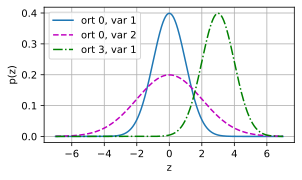

In [0]:
# Using numpy again for visualizations.
x = np.arange(-7, 7, 0.01)

# Mean and variance pairs
parameters = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in parameters], xlabel='z',
         ylabel='p(z)', figsize=(4.5, 2.5),
         legend=['ort %d, var %d' % (mu, sigma) for mu, sigma in parameters]);

Görüldüğü gibi ortalamayı değiştirmek $x$ ekseninde kaymalara, yaryansı değiştirmek dağılımın genişlemesine veya daralmasına sebep oluyor. 

Lineer regresyonda en küçük karelerin kullanımını açıklamak için, gözlemlerdeki hataların gürültülü olduğunu ve bu gürültünün normal dağılımdan geldiğini kabul edelim:  

$$\epsilon \sim \mathcal{N}(0, \sigma^2) \text{ olmak üzere } y = \mathbf{w}^\top \mathbf{x} + b + \epsilon.$$

Dolayısıyla verilen bir $\mathbf{x}$ için özel bir $y$ görmenin olabililirlik (likelihood) fonksiyonunu 

$$p(y|\mathbf{x}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (y - \mathbf{w}^\top \mathbf{x} - b)^2\right)$$

şeklinde yazabiliriz. Buradan maksimum olabilirlik prensibine göre $b$ ve $\mathbf{w}$ parametrelerinin en iyi değerleri veri kümesinin olabilirliğini en büyük yapanlardır:

$$P(Y\mid X) = \prod_{i=1}^{n} p(y^{(i)}|\mathbf{x}^{(i)}).$$

Maksimum olabilirlik prensibine göre seçilen kestiricilere (estimators) *maksimum olabilirlik kestiricileri* (MLE) denir. Üstel fonksiyonların çarpımını maksimum yapmak yerine genellikle logaritması maksimum yaılır. Optimizasyonda alışkanlık olarak maksimum yerine minimum incelendiğinden olabilirlik fonksiyonunun  negatifinin minimumunu arayacağız (NLL - Negative Log-Likelihood): $-\log p(\mathbf y|\mathbf X)$. İşlem yapılırsa    

$$-\log p(\mathbf y|\mathbf X) = \sum_{i=1}^n \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2$$

elde edilir. Şimdi yapacağımız son kabul $\sigma$ yani varyansın sabit olması. Dolayısıyla yukarıdaki eşitliğin sağ tarafındaki ilk terim ihmal edilebilir çünkü $\mathbf{w}$ veya $b$ ile bağımlı değildir. Maksimumu bulmak için türev alacağımız için türevi sıfır olacak birşeyi almadık. İkinci terim ise $\frac{1}{\sigma^2}$ katsayısı hariç hataların kareleri toplamıdır. Neyse ki çözüm $\sigma$ varyansından bağımsızdır. Sonuç olarak, hataların karelerinin toplamını minimize etmenin, Gauss dağılımından gelen gürültü eklenmiş lineer modelin maksimum olabilirlik çıkarımına denk olduğunu gösterdik.  

## Lİneer Regresyondan Derin Ağlara (Deep Networks)

Şu ana kadar sadece lineer fonksiyonlala çalıştık. Sinir ağları (neural networks) çok geniş bir model ailesini kapsar ama lineer modeli sinir ağları içerisinde tanımlamak iyi bir başlangıç olacaktır. Şimdi modelimizi *katmak* (layer) gösterimi ile ifade edelim.    

### Yapay Sinir Ağı Diyagramı

Derin Öğrenme uygulayıcıları modelin diyagramını çizerek görselleştirmek isterler. Aşağıda lineer modeli bir sinir ağı olarak gösteriyoruz. Burada sadece bağlantılar gösteriliyor, ağırlıkların değerleri verilmiyor. Görüldüğü gibi bu durumda her girdi (input) çıktıya (output) bağlı.   

![Linear regression is a single-layer neural network. ](https://d2l.ai/_images/singleneuron.svg)

Gafikte, hesaplanacak bir tek nöron veya düğüm (node) olduğundan, lineer modeli tek sinir hücreli (neuron) yapay (artificial) sinir ağı olarak görürüz. Girdiler hazır verildiği için hesaplanmaz. Bu modelde her girdi çıktıya bağlı olduğundan bu dönüşüme *tam bağlantılı katman* (fully-connected layer) veya *yoğun katman* (dense layer) denir. Bu tür katmanları daha sonra ayrıntılı inceleyeceğiz.  

### Biyoloji

Lineer regresyon (1795) hesaplamalı yapay sinir ağlarından daha eski olsa da lineer regresyonu sinir ağlarının kronolojisine yerleştirmek doğru olmaz. Lineer modellerin yaay sinir ağlarına başlangıç için neden iyi oldğunu görmek için sibernetik/nöroeurofizyoloji uzmanı Warren McCulloch ve Walter Pitts tarafından yaay sinir ağlarının nasıl geliştirildiğine bakalım. Aşağıdaki resimde girdi terminali (dendrites), işlemci (nucleus), çıkış kablosu (axon) ve çıkış terminali (axon terminals) ve diğer nöronlara bağlantıyı sinapsis ile sağlayan bağlantılar vardır. 

![The real neuron](https://d2l.ai/_images/Neuron.svg)
:label:`fig_Neuron`

Diğer nöronlardan veya retina gibi algılayıcılardan gelen $x_i$ bilgisi dentrit tarafından alınır. Bu bilgilerin yani girdilerin etki dereceleri $w_i$ *sinatik ağırlıklar* sayeinde belirlenir ve $x_i w_i$ çarpımları elde edilir. Farklı algılayıcılardan gelen bu ağırlıklı girdiler nükleusta bir araya getirilerek $y = \sum_i x_i w_i + b$ toplamı oluşturulur. Sonra işlemden geçirilmek üzere aksona gönderilir ve lineer olmayan $\sigma(y)$ işlemi uygulanır. Buradan ya kas gibi hedefe ya da diğer bir nörona aktarılır. 

Bu şekilde bir çok birimin doğru biçimde bağlanarak ve doğru öğrenme algoritması ile çok karmaşı davranışlar sergileceyeceği fikri nöronların biyolojik inclenenmesi sonucu elde edilmiştir. 

Derin Öğrenme araştırmalarının önemli kısmı nörolojiden (neuroscience) az da olsa etkilenmiştir. *Artificial Intelligence: A Modern Approach* kitabında Stuart Russell ve Peter Norvig, uçaklar kuşlardan ilham alsa da, kuş bilimi havacılığı yönledirmemiştir demektedir. Benzer şekilde, Derin Öğrenme alanındaki gelişmeler nörolojiden çok matematik, istatistik ve bilgisayar bilimleri kaynaklıdır.  

## Özet

* 
* Key ingredients in a machine learning model are training data, a loss function, an optimization algorithm, and quite obviously, the model itself.
* Vectorizing makes everything better (mostly math) and faster (mostly code).
* Minimizing an objective function and performing maximum likelihood can mean the same thing.
* Linear models are neural networks, too.

## Exercises

1. Assume that we have some data $x_1, \ldots, x_n \in \mathbb{R}$. Our goal is to find a constant $b$ such that $\sum_i (x_i - b)^2$ is minimized.
    * Find a closed-form solution for the optimal value of $b$.
    * How does this problem and its solution relate to the normal distribution?
1. Derive the closed-form solution to the optimization problem for linear regression with squared error. To keep things simple, you can omit the bias $b$ from the problem (we can do this in principled fashion by adding one column to $X$ consisting of all ones).
    * Write out the optimization problem in matrix and vector notation (treat all the data as a single matrix, all the target values as a single vector).
    * Compute the gradient of the loss with respect to $w$.
    * Find the closed form solution by setting the gradient equal to zero and solving the matrix equation.
    * When might this be better than using stochastic gradient descent? When might this method break?
1. Assume that the noise model governing the additive noise $\epsilon$ is the exponential distribution. That is, $p(\epsilon) = \frac{1}{2} \exp(-|\epsilon|)$.
    * Write out the negative log-likelihood of the data under the model $-\log P(Y \mid X)$.
    * Can you find a closed form solution?
    * Suggest a stochastic gradient descent algorithm to solve this problem. What could possibly go wrong (hint - what happens near the stationary point as we keep on updating the parameters). Can you fix this?


[Discussions](https://discuss.d2l.ai/t/40)